In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets

In [14]:
datasets = pd.read_csv('Financial Indicators_X.csv', encoding='unicode_escape')
x = datasets.drop('Company Name', axis=1)

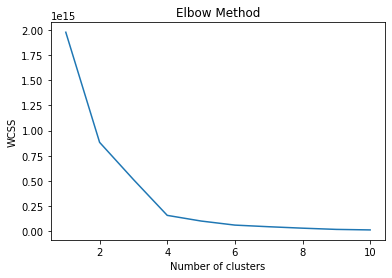

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',
                    max_iter=1500, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


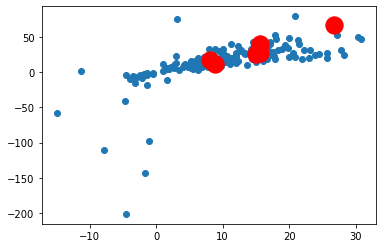

In [16]:
kmeans = KMeans(n_clusters=6, init='k-means++',
                max_iter=1500, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(x)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()


In [17]:
Centers = kmeans.cluster_centers_

Clustering_Centers = pd.DataFrame(Centers)
Clustering_Centers.to_csv(
    'Clustering_Centers_KMeans.csv', mode='a', header=True)


In [18]:
Clustering_results = pd.DataFrame(datasets)
Clustering_results["Clustering_results"] = pred_y

Clustering_results.to_csv(
    'Clustering_results_KMeans.csv', mode='a', header=True)
